<center><img src="https://i2.wp.com/hackwagon.com/wp-content/uploads/2017/02/Logo-Web-Export.png?ssl=1" width=200/></center>
<h1> Hackwagon Academy DS102 Lesson 5 </h1>
<h2> Linear Regression </h2> 
<h3> Lesson Outline </h3>

- 1. [Scikit Learn - SKLearn](#1)
    - 1.1 [5 Standard Steps](#1.1)
- 2. [Simple Linear Regression](#2)
    - 2.1 [Example - Housing Prices](#2.1)
    - [Practice I](#P1)
- 3. [Multivariate Linear Regression](#3)
    - 1.1 [Example - Housing Prices](#3.1)
    - [Practice II](#P2)

<hr/>

<a id='1'><h2><img src="https://images.vexels.com/media/users/3/153978/isolated/preview/483ef8b10a46e28d02293a31570c8c56-warning-sign-colored-stroke-icon-by-vexels.png" width=23 align="left"><font color="salmon">&nbsp;1.</font><font color="salmon"> Scikit Learn - SKLearn </font> </h2></a>

<a id='1.1'><h3>5 Standard Steps</h3></a>

**Step 1**: Choose a class of machine learning model from the library 

**Step 2**: Choose the model’s hyperparameters by instantiating with desired values (tuning)

**Step 3**: Arrange data into features and target

**Step 4**: Fit model to your data by using the fit() method of the model 

**Step 5**: Apply the model to new data:
    - For supervised learning, using the predict() method
    - For unsupervised learning, using the predict() or transform() method

In [30]:
import seaborn as sns
import numpy as np
from sklearn import datasets, linear_model

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# ----- STEP 1 & 2 -----
# Create linear regression object
regr = linear_model.LinearRegression()

#  ----- STEP 3 -----
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# ----- STEP 4 -----
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# ----- STEP 5 -----
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)


<a id='2'><h2><img src="https://images.vexels.com/media/users/3/153978/isolated/preview/483ef8b10a46e28d02293a31570c8c56-warning-sign-colored-stroke-icon-by-vexels.png" width=23 align="left"><font color="salmon">&nbsp;2.</font><font color="salmon"> Simple Linear Regression </font> </h2></a>

<a id='2.1'><h3>2.1 Example - Tips </h3></a>



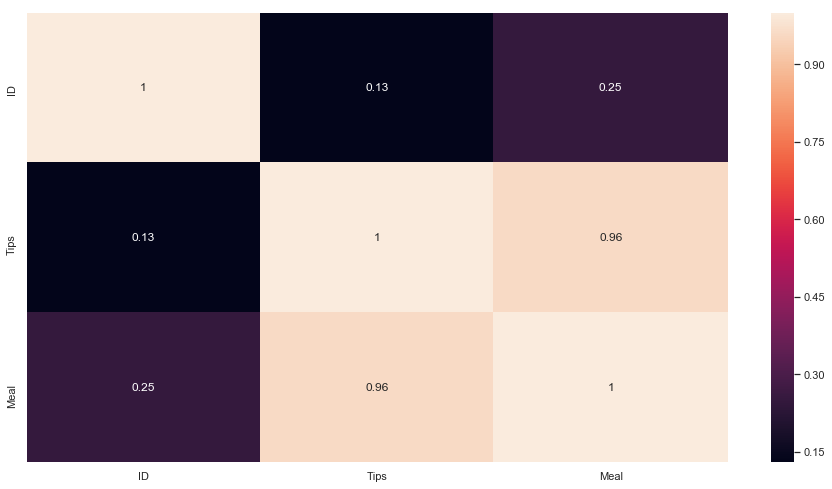

In [57]:
import pandas as pd

data = {
    'ID': [1, 2, 3, 4, 5, 6],
    'Tips': [10, 25, 12, 8, 15, 20],
    'Meal': [80, 150, 75, 60, 100, 150]
}

tips_df = pd.DataFrame(data)
tips_df

sns.set(rc={'figure.figsize': (15.7, 8.27)})
correlation_matrix = tips_df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [2]:
from sklearn import datasets, linear_model

# Step 1 & 2
regr = linear_model.LinearRegression()

# Step 3
X = tips_df[['Meal']]  # << Must use 2 square brackets
y = tips_df[['Tips']]  # << Must use 2 square brackets

# Step 4
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Step 5 is in another cell because the model has been trained, there is not need to keep re-training the model again and again.

In [43]:
# Step 5
# Predicting Meal of $10
regr.predict([[10]])  # < Note that it's a list of lists

array([9535.29747434])

In [44]:
print(regr.coef_)
print(regr.intercept_)

#  Tips = -1.27  + 0.158 (Meal)
# With every $1 increase in meal, tips would increase by $0.15

[938.23786125]
152.91886182616167


### Housing Prices

Filter to just two columns, where the predictor variable is `sqft_living` and the target variable `price`.  

In [45]:
housing_x = pd.read_csv('housing_x.csv')
price = pd.read_csv('housing_y.csv')

### Train Test Split

Filter to just to the `RunTime` and `Performance` as a DataFrame, `rt_perf_df`. Conduct `train_test_split()` to get the four splits of data. 

In [46]:
from sklearn.model_selection import train_test_split
sqft_living = housing_x[['sqft_living']] # << must be a DataFrame (NOT housing['sqft_living'])

X_train, X_test, y_train, y_test = train_test_split(sqft_living, price, random_state=42)

### Fit Model

Using the trained datasets, train the model.

In [47]:
simple_housing_lr = linear_model.LinearRegression()

simple_housing_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Interpret

With the fitted model, interpret and create the linear equation of the model. 

In [48]:
print(simple_housing_lr.coef_)
print(simple_housing_lr.intercept_)

# price = -34785.44 + 276.6(Sqft_living)
# For every increase in SQFT_Living, price of the house increases by $276.6 

[[276.61559523]]
[-34785.44388888]


### Predict 

Using `.predict()`, predict with a custom square-feet.

In [49]:
custom_sqft = 10000

simple_housing_lr.predict([[custom_sqft]]) # IMPORTANT - It's a nested list 

array([[2731370.50837813]])

### Assess Performance of Model

Using `r2_score` calculate the R-squared score of the model.

In [50]:
from sklearn.metrics import r2_score 
fitted_values = simple_housing_lr.predict(X_test)

print(r2_score(y_test, fitted_values))

0.49434750583619946


<a id='P1'><h2> <img src="https://cdn.shopify.com/s/files/1/1200/7374/products/book_aec28e76-52ec-44ab-bc01-41df1279c89f_550x825.png?v=1473897430" width=25 align="left"> <font color="darkorange"> &nbsp; Practice I </font><font color="skyblue"> * </font></h2></a>

### Fitness Dataset

Based on this fitness dataset, predict the `RunTime` based on the following predictors:

1. Performance

### Read  Dataset

Read the `fitness-data.csv` as `fit_df`. 

In [51]:
fit_df = pd.read_csv('fitness-data.csv')

fit_df.head()

,Name,Gender,RunTime,Age,Weight,Oxygen_Consumption,Run_Pulse,Rest_Pulse,Maximum_Pulse,Performance
0,Donna,F,8.17,42.0,68.15,59.57,166.0,40.0,172.0,90.0
1,Gracie,F,8.63,38.0,81.87,60.06,170.0,48.0,186.0,94.0
2,Luanne,F,8.65,43.0,85.84,54.30,156.0,45.0,168.0,83.0
3,Mimi,F,8.92,50.0,70.87,54.63,146.0,48.0,155.0,67.0
4,Chris,M,8.95,49.0,81.42,49.16,180.0,44.0,185.0,72.0


### Train Test Split

Filter to just to the `RunTime` and `Performance` as a DataFrame, `rt_perf_df`. Conduct `train_test_split()` to get the four splits of data. 

In [52]:
rt_perf_df = fit_df[['RunTime','Performance']]

X_train, X_test, y_train, y_test = train_test_split(rt_perf_df[['RunTime']],rt_perf_df[['Performance']],random_state = 42)

### Fit Model

Create a LinearRegression variable, named  `simple_performance_lr`. Using the trained datasets, train the model.

In [53]:
simple_performance_lr = linear_model.LinearRegression()

simple_performance_lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Interpret

With the fitted model, interpret and create the linear equation of the model. 

In [54]:
print(simple_performance_lr.coef_)
print(simple_performance_lr.intercept_)

# Performance = 177.02963047 + -(11.21132361)
# For every increase in run time, performance will decrease by 11.23132361

[[-11.23132361]]
[177.02963047]


### Plotting Linear Regression Graph

The straight line can be seen in the plot, showing how linear regression attempts to draw a straight line that will best minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation.

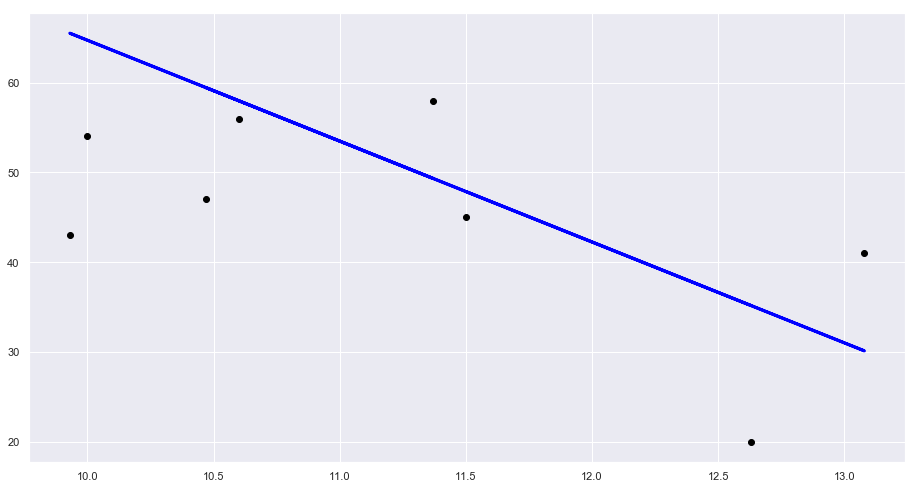

In [59]:
import matplotlib.pyplot as plt

y_pred = simple_performance_lr.predict(X_test)

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.show()

### Predict 

Using `.predict()`, predict with custom values. 

In [25]:
simple_performance_lr.predict([[8.1]])

array([[86.0559092]])

### Assess Performance of Model

Using `r2_score` calculate the R-squared score of the model.

In [27]:
fitted_values = simple_performance_lr.predict(X_test)

print(r2_score(y_test, fitted_values))

-0.1904585301796773



<a id='3'><h2><img src="https://images.vexels.com/media/users/3/153978/isolated/preview/483ef8b10a46e28d02293a31570c8c56-warning-sign-colored-stroke-icon-by-vexels.png" width=23 align="left"><font color="salmon">&nbsp;3.</font><font color="salmon"> Multivariate Linear Regression </font> </h2></a>

<a id='3.1'><h3>3.1 Example - Housing Prices  </h3></a>

This time, we'll apply more variables to the model and drop variables where necessary.

In [56]:
# Read from CSV the following files: KX_train, KX_test, Ky_train, Ky_test
x_all = pd.read_csv('housing_x.csv')
y_all = pd.read_csv('housing_y.csv')
display(x_all.head())
display(y_all.head())

,sqft_living,sqm_living,floors
0,3500,106.71,2.0
1,1180,35.98,1.0
2,1260,38.41,1.5
3,1520,46.34,1.0
4,1780,54.27,1.0


,price
0,788600
1,600000
2,523000
3,415000
4,535000


### Feature Selection

Detect for multicollinearity and drop variables where necessary by using `.corr()`.

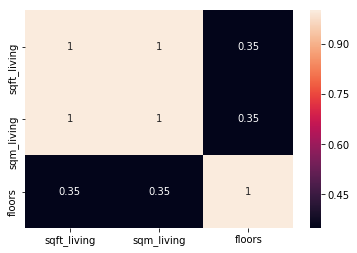

In [95]:
# x_all.corr()

correlation_matrix = x_all.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)


### Train Test Split

Drop and filter to the valid predictors in the model as a DataFrame, `housing_df`. Conduct `train_test_split()` to get the four splits of data. 

In [31]:
from sklearn.model_selection import train_test_split
# Since either SQFT or SQM are highly correlated, drop either one

housing_x = x_all[['sqft_living', 'floors']]

X_train, X_test, y_train, y_test = train_test_split(housing_x, y_all, random_state=42)

NameError: name 'x_all' is not defined

### Fit Model

Create a LinearRegression variable, `multi_housing_lr`. With the train dataframes, use `.fit()` to train the model.

In [32]:
multi_housing_lr = linear_model.LinearRegression()

multi_housing_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Interpret

With the fitted model, interpret and create the linear equation of the model. 

In [33]:
print(multi_housing_lr.coef_)
print(multi_housing_lr.intercept_)

# Housing Price = -48237.317 + 274 (SQFT_Living) + 12566.866 (Floors)

[[-11.23132361]]
[177.02963047]


### Assess Performance of Model

Using `r2_score` calculate the R-squared score of the model.

In [34]:
from sklearn.metrics import r2_score 
fitted_values = multi_housing_lr.predict(X_test)

print(r2_score(y_test, fitted_values))

-0.1904585301796773


<a id='P2'><h2> <img src="https://cdn.shopify.com/s/files/1/1200/7374/products/book_aec28e76-52ec-44ab-bc01-41df1279c89f_550x825.png?v=1473897430" width=25 align="left"> <font color="darkorange"> &nbsp; Practice II </font><font color="skyblue"> * </font></h2></a>

### Fitness Dataset

Based on this fitness dataset, predict the `RunTime` based on the following predictors:

1. Age
2. Weight
3. Oxygen_Consumption
4. Run_Pulse
5. Rest_Pulse
6. Maximum_Pulse
7. Performance

### Read 

In [72]:
fitness_data = fit_df
y_all = fit_df['RunTime']

### Feature Selection

With the variables above, detect for multicollinearity and drop variables where necessary by using `.corr()`.

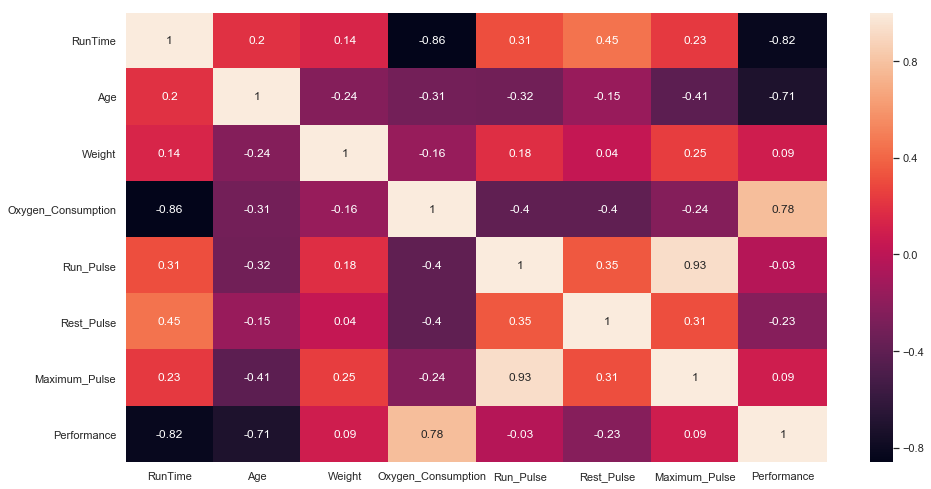

In [83]:
fitness_data.corr()

sns.heatmap(data=fitness_data.corr().round(2), annot=True)


### Train Test Split

Based on the correlation matrix, fliter for the __valid__ predictor variables and do `train_test_split` with the target variable `RunTime`. 

In [74]:
from sklearn.model_selection import train_test_split
# Oxygen Consumption and Performance has a strong correlation with Run Time

x_all = fitness_data[['Oxygen_Consumption','Performance']]

X_train, X_test, y_train, y_test = train_test_split(x_all, y_all, random_state=42)

### Fit Model

Using the train dataframes, create a LinearRegression variable called `multi_runtime_lr`. Use `.fit()`, train the model.

In [75]:
multi_runtime_lr = linear_model.LinearRegression()

multi_runtime_lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Interpret

With the fitted model, interpret and create the linear equation of the model. 

In [78]:
print(multi_runtime_lr.coef_)
print(multi_runtime_lr.intercept_)

#Run Time = 18.30778603786936 -0.12009187 (Oxygen Consumption) - 0.03559525 (Performance)

[-0.12009187 -0.03559525]
18.30778603786936


### Assess Performance of Model

Using `r2_score` calculate the R-squared score of the model.

In [79]:
fitted_values = multi_runtime_lr.predict(X_test)

print(r2_score(y_test, fitted_values))

0.6697899064850712


In [80]:
fitted_values

array([12.86306063, 11.13580287, 10.88596356, 10.63770968, 10.70654656,
       10.7809553 , 12.1119577 , 10.95119768])